**Task 1**

In [1]:
import numpy as np

In [13]:
# Define Euler Approx.
def Euler_Approx(f,y_0,x_0,x_N,N):
    """
    f = a function of x
    x_0 = initial x value
    x_N = final x value
    N = number of steps between x values
    """
    dx = (x_N-x_0)/(N-1)
    X = np.arange(x_0,x_N,dx)
    
    # Initialise y array with first value.
    Y = [y_0]
    
    # Iterate for y over x.
    for i in range(int(N-1)):
        Y.append(Y[i]+f(X[i],Y[i])*dx)
    return Y

In [3]:
# Define Range-Kutta Approx (Second Order).
def Heun_Approx(df,y_0,x_0,x_N,N):
    """
    df = a derivative function of x and y (dx/dy)
    y_0 = initial y value
    x_0 = initial x value
    x_N = final x value
    N = number of steps between x_0 and x_N
    """
    h = (x_N-x_0)/(N-1) # step size
    X = np.linspace(x_0,x_N,N) # array of x values
    
    # Initialise y array with first value.
    Y = [y_0]
    
    # Iterate y(x) over x.
    for i in range(int(N-1)):
        k1 = df(X[i],Y[i])
        k2 = df(X[i]+h,Y[i]+k1*h)
        Y.append(Y[i]+(0.5*k1+0.5*k2)*h)
        
    return Y

In [4]:
# Define Range-Kutta Approx (Fouth Order).
def RK4_Approx(df,y_0,x_0,x_N,N):
    """
    df = a derivative function of x and y (dx/dy)
    y_0 = initial y value
    x_0 = initial x value
    x_N = final x value
    N = number of steps between x_0 and x_N
    """
    h = (x_N-x_0)/(N-1) # step size
    X = np.linspace(x_0,x_N,N) # array of x values
    
    # Initialise y array with first value.
    Y = [y_0]
    
    # Iterate y(x) over x.
    for i in range(int(N-1)):
        k1 = h*df(X[i],
                  Y[i])
        k2 = h*df(X[i]+h/2,
                  Y[i]+k1/2)
        k3 = h*df(X[i]+h/2,
                  Y[i]+k2/2)
        k4 = h*df(X[i]+h,
                  Y[i]+k3)
        Y.append(Y[i]+k1/6+k2/3+k3/3+k4/6+(h**5))

    return Y

In [5]:
# define x(t).
def x(t):
    return -np.exp(1-np.cos(t))

# define f(x,t) = dx/dt.
def f(t,x):
    return x*np.sin(t)

# set initial value x(0).
x_0 = -1

# create time array.
t_0, t_N, N = 0., 10., 51
T = np.linspace(t_0,t_N,N)

In [14]:
# Calculate x for all t.
X = x(T)

# Calculate approximations using the above functions.
Eul = Euler_Approx(f,x_0,t_0,t_N,N)
RK2 = Heun_Approx(f,x_0,t_0,t_N,N)
RK4 = RK4_Approx(f,x_0,t_0,t_N,N)

# Calculate difference between each approx and the true value.
delta_Eul = abs(Eul-X)
delta_RK2 = abs(RK2-X)
delta_RK4 = abs(RK4-X)

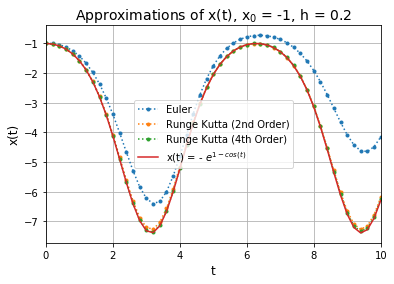

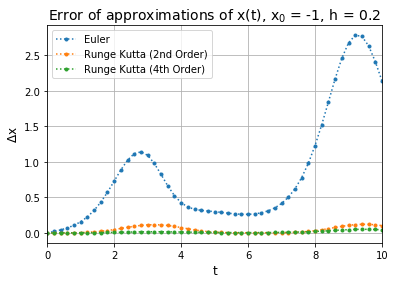

In [15]:
import matplotlib.pyplot as plt

# Plot the function and each approximation.
plt.subplot(111)
plt.plot(T,Eul,'.:',label = "Euler")
plt.plot(T,RK2,'.:',label = "Runge Kutta (2nd Order)")
plt.plot(T,RK4,'.:',label = "Runge Kutta (4th Order)")
plt.plot(T,X,'-',label = "x(t) = - $e^{1-cos(t)}$")
plt.xlim(0.,10.)
plt.xlabel('t',fontsize='12')
plt.ylabel('x(t)',fontsize='12')
plt.title('Approximations of x(t), x$_0$ = -1, h = 0.2',fontsize='14')
plt.grid()
plt.legend()

plt.show()

# Plot the accuracy/error of each approx.
plt.subplot(111)
plt.plot(T,delta_Eul,'.:',label="Euler")
plt.plot(T,delta_RK2,'.:',label="Runge Kutta (2nd Order)")
plt.plot(T,delta_RK4,'.:',label="Runge Kutta (4th Order)")
plt.xlim(0.,10.)
plt.xlabel('t',fontsize='12')
plt.ylabel('$\Delta$x',fontsize='12')
plt.title('Error of approximations of x(t), x$_0$ = -1, h = 0.2',fontsize='14')
plt.grid()
plt.legend()

plt.show()